In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris() # 鸢尾花数据集
X = iris.data[:,:2] # 只选择两个特征
y = iris.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [31]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto') # 默认multi_class='auto'(可选参数为:'auto','multinomial', 'ovr', 'ovo')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [33]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red', 'white'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


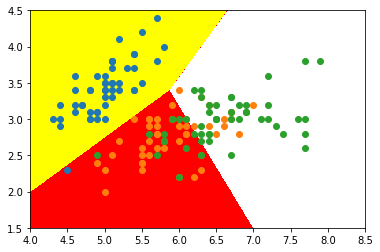

In [34]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [35]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="lbfgs") # 即MvM(若干类作为正例,若干其他类作为反类,显然OvR/OvO是MvM的特例)
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

In [36]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs") # 即OvR
log_reg3.fit(X_train, y_train)
log_reg3.score(X_test, y_test)

0.7894736842105263